<a href="https://colab.research.google.com/github/shirinyamani/DS24/blob/main/flagging_loan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [247]:
import numpy as np
import pandas as pd
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [248]:
df = pd.read_csv('./test_task.csv')

In [249]:

pd.set_option('display.max_columns', 25)

In [250]:
df.isnull().sum()

loanKey                   0
rep_loan_date             0
first_loan                0
dpd_5_cnt              3482
dpd_15_cnt             3482
dpd_30_cnt             3482
first_overdue_date     3482
close_loans_cnt          15
federal_district_nm      11
TraderKey                 0
payment_type_0            0
payment_type_1            0
payment_type_2            0
payment_type_3            0
payment_type_4            0
payment_type_5            0
past_billings_cnt       248
score_1                 650
score_2                3918
age                       0
gender                    0
bad_flag                  0
dtype: int64

In [251]:
df


,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,0,0,10,0,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,0,0,6,0,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,0,0,0,5,0,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,0,0,4,0,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,0,3,0,0,0,0,3.0,NaN,NaN,33.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,0,0,1,0,0,0,NaN,NaN,563.089780,26.0,False,0
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,0,0,4,0,0,0,3.0,NaN,576.875277,38.0,False,1
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,0,0,4,0,0,0,4.0,NaN,554.816921,21.0,False,0
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,0,0,4,0,0,0,4.0,NaN,563.089780,35.0,False,0


In [252]:
df['dpd_5_cnt'].value_counts()

1.0    484
2.0    114
3.0     47
4.0     14
5.0      7
0.0      4
6.0      4
7.0      1
Name: dpd_5_cnt, dtype: int64

In [253]:
df.describe()

,loanKey,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,payment_type_5,past_billings_cnt,score_1,score_2,age,bad_flag
count,4157.000000,675.000000,675.000000,675.000000,4142.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.000000,4157.0,3909.000000,3507.000000,239.000000,4157.000000,4157.000000
mean,525386.651431,1.444444,0.733333,0.280000,1.184693,12.338225,0.018523,0.596103,3.755834,0.758239,0.019485,0.0,4.979023,578.911345,552.546610,34.561222,0.100313
std,202001.338206,0.900599,0.764572,0.502339,1.723715,9.902927,0.330359,2.564887,3.810703,2.212487,0.245960,0.0,3.491556,48.989869,21.492840,10.834143,0.300453
min,58567.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,1.000000,384.220628,485.874267,18.000000,0.000000
25%,363964.000000,1.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.0,2.000000,547.429791,535.545724,26.000000,0.000000
50%,543603.000000,1.000000,1.000000,0.000000,1.000000,6.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.0,4.000000,588.531315,556.757944,32.000000,0.000000
75%,687271.000000,2.000000,1.000000,1.000000,2.000000,14.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.0,6.000000,612.323090,567.608057,41.000000,0.000000
max,884377.000000,7.000000,5.000000,3.000000,31.000000,80.000000,15.000000,81.000000,33.000000,35.000000,7.000000,0.0,21.000000,691.528420,603.311653,74.000000,1.000000


In [254]:
#for the same loan or a different loan the past days
df['loanKey'].nunique()

4157

In [255]:
df.dtypes

loanKey                  int64
rep_loan_date           object
first_loan              object
dpd_5_cnt              float64
dpd_15_cnt             float64
dpd_30_cnt             float64
first_overdue_date      object
close_loans_cnt        float64
federal_district_nm     object
TraderKey                int64
payment_type_0           int64
payment_type_1           int64
payment_type_2           int64
payment_type_3           int64
payment_type_4           int64
payment_type_5           int64
past_billings_cnt      float64
score_1                float64
score_2                float64
age                    float64
gender                    bool
bad_flag                 int64
dtype: object

<ipython-input-259-ae002905ba86>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cmap='coolwarm' )


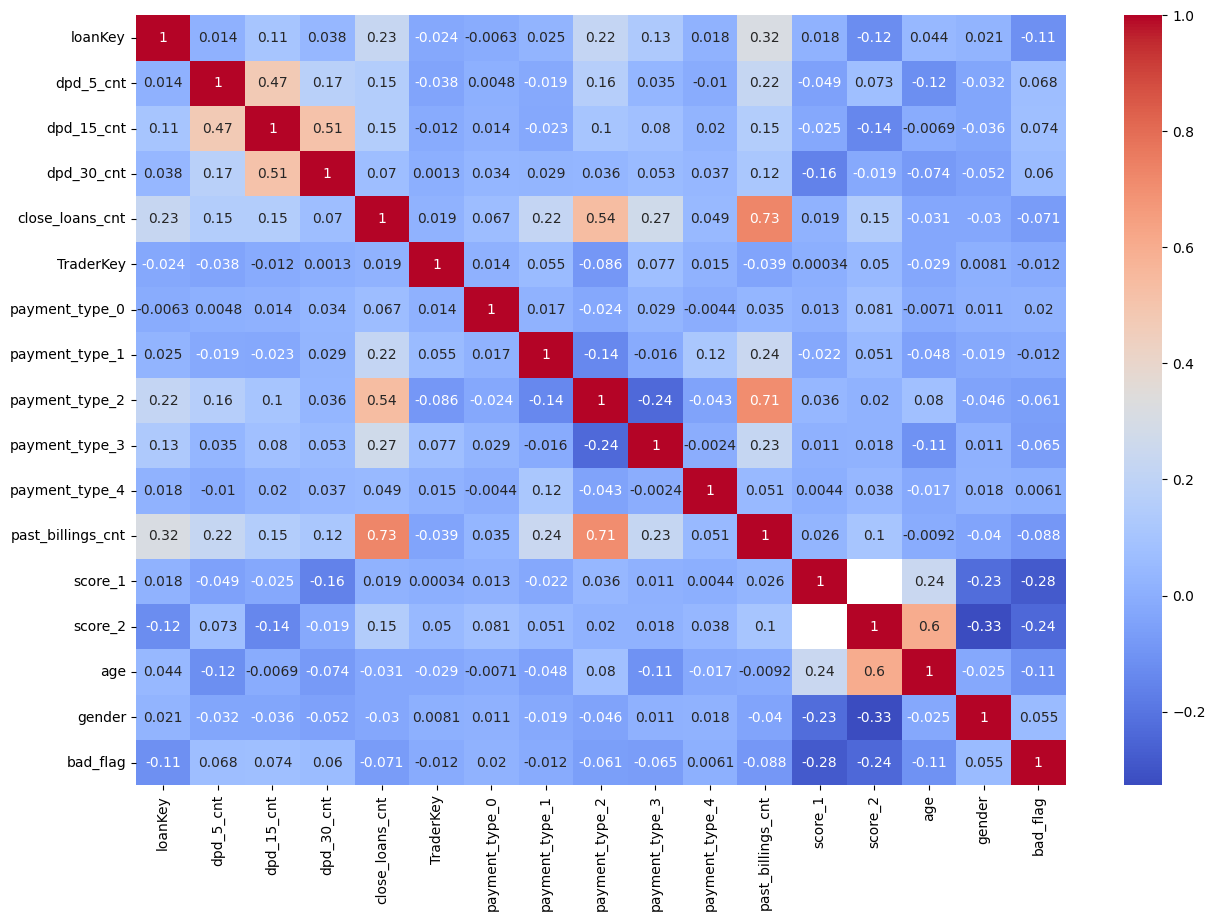

In [259]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm' )
plt.show()

In [257]:
df['payment_type_5'].value_counts()

0    4157
Name: payment_type_5, dtype: int64

In [260]:
df.drop(columns=['payment_type_5'], axis=1, inplace=True)

KeyError: "['payment_type_5'] not found in axis"

In [ ]:
## distribution of the values ----> skewness ? ----> take care of it ? ---> outliers
## trends in the bivariate fasion
new_df = df[['rep_loan_date', 'first_loan', 'close_loans_cnt', 'TraderKey', 'payment_type_0', 'payment_type_1',
       'payment_type_2', 'payment_type_3', 'payment_type_4',
       'past_billings_cnt', 'score_1', 'score_2', 'age', 'bad_flag']]

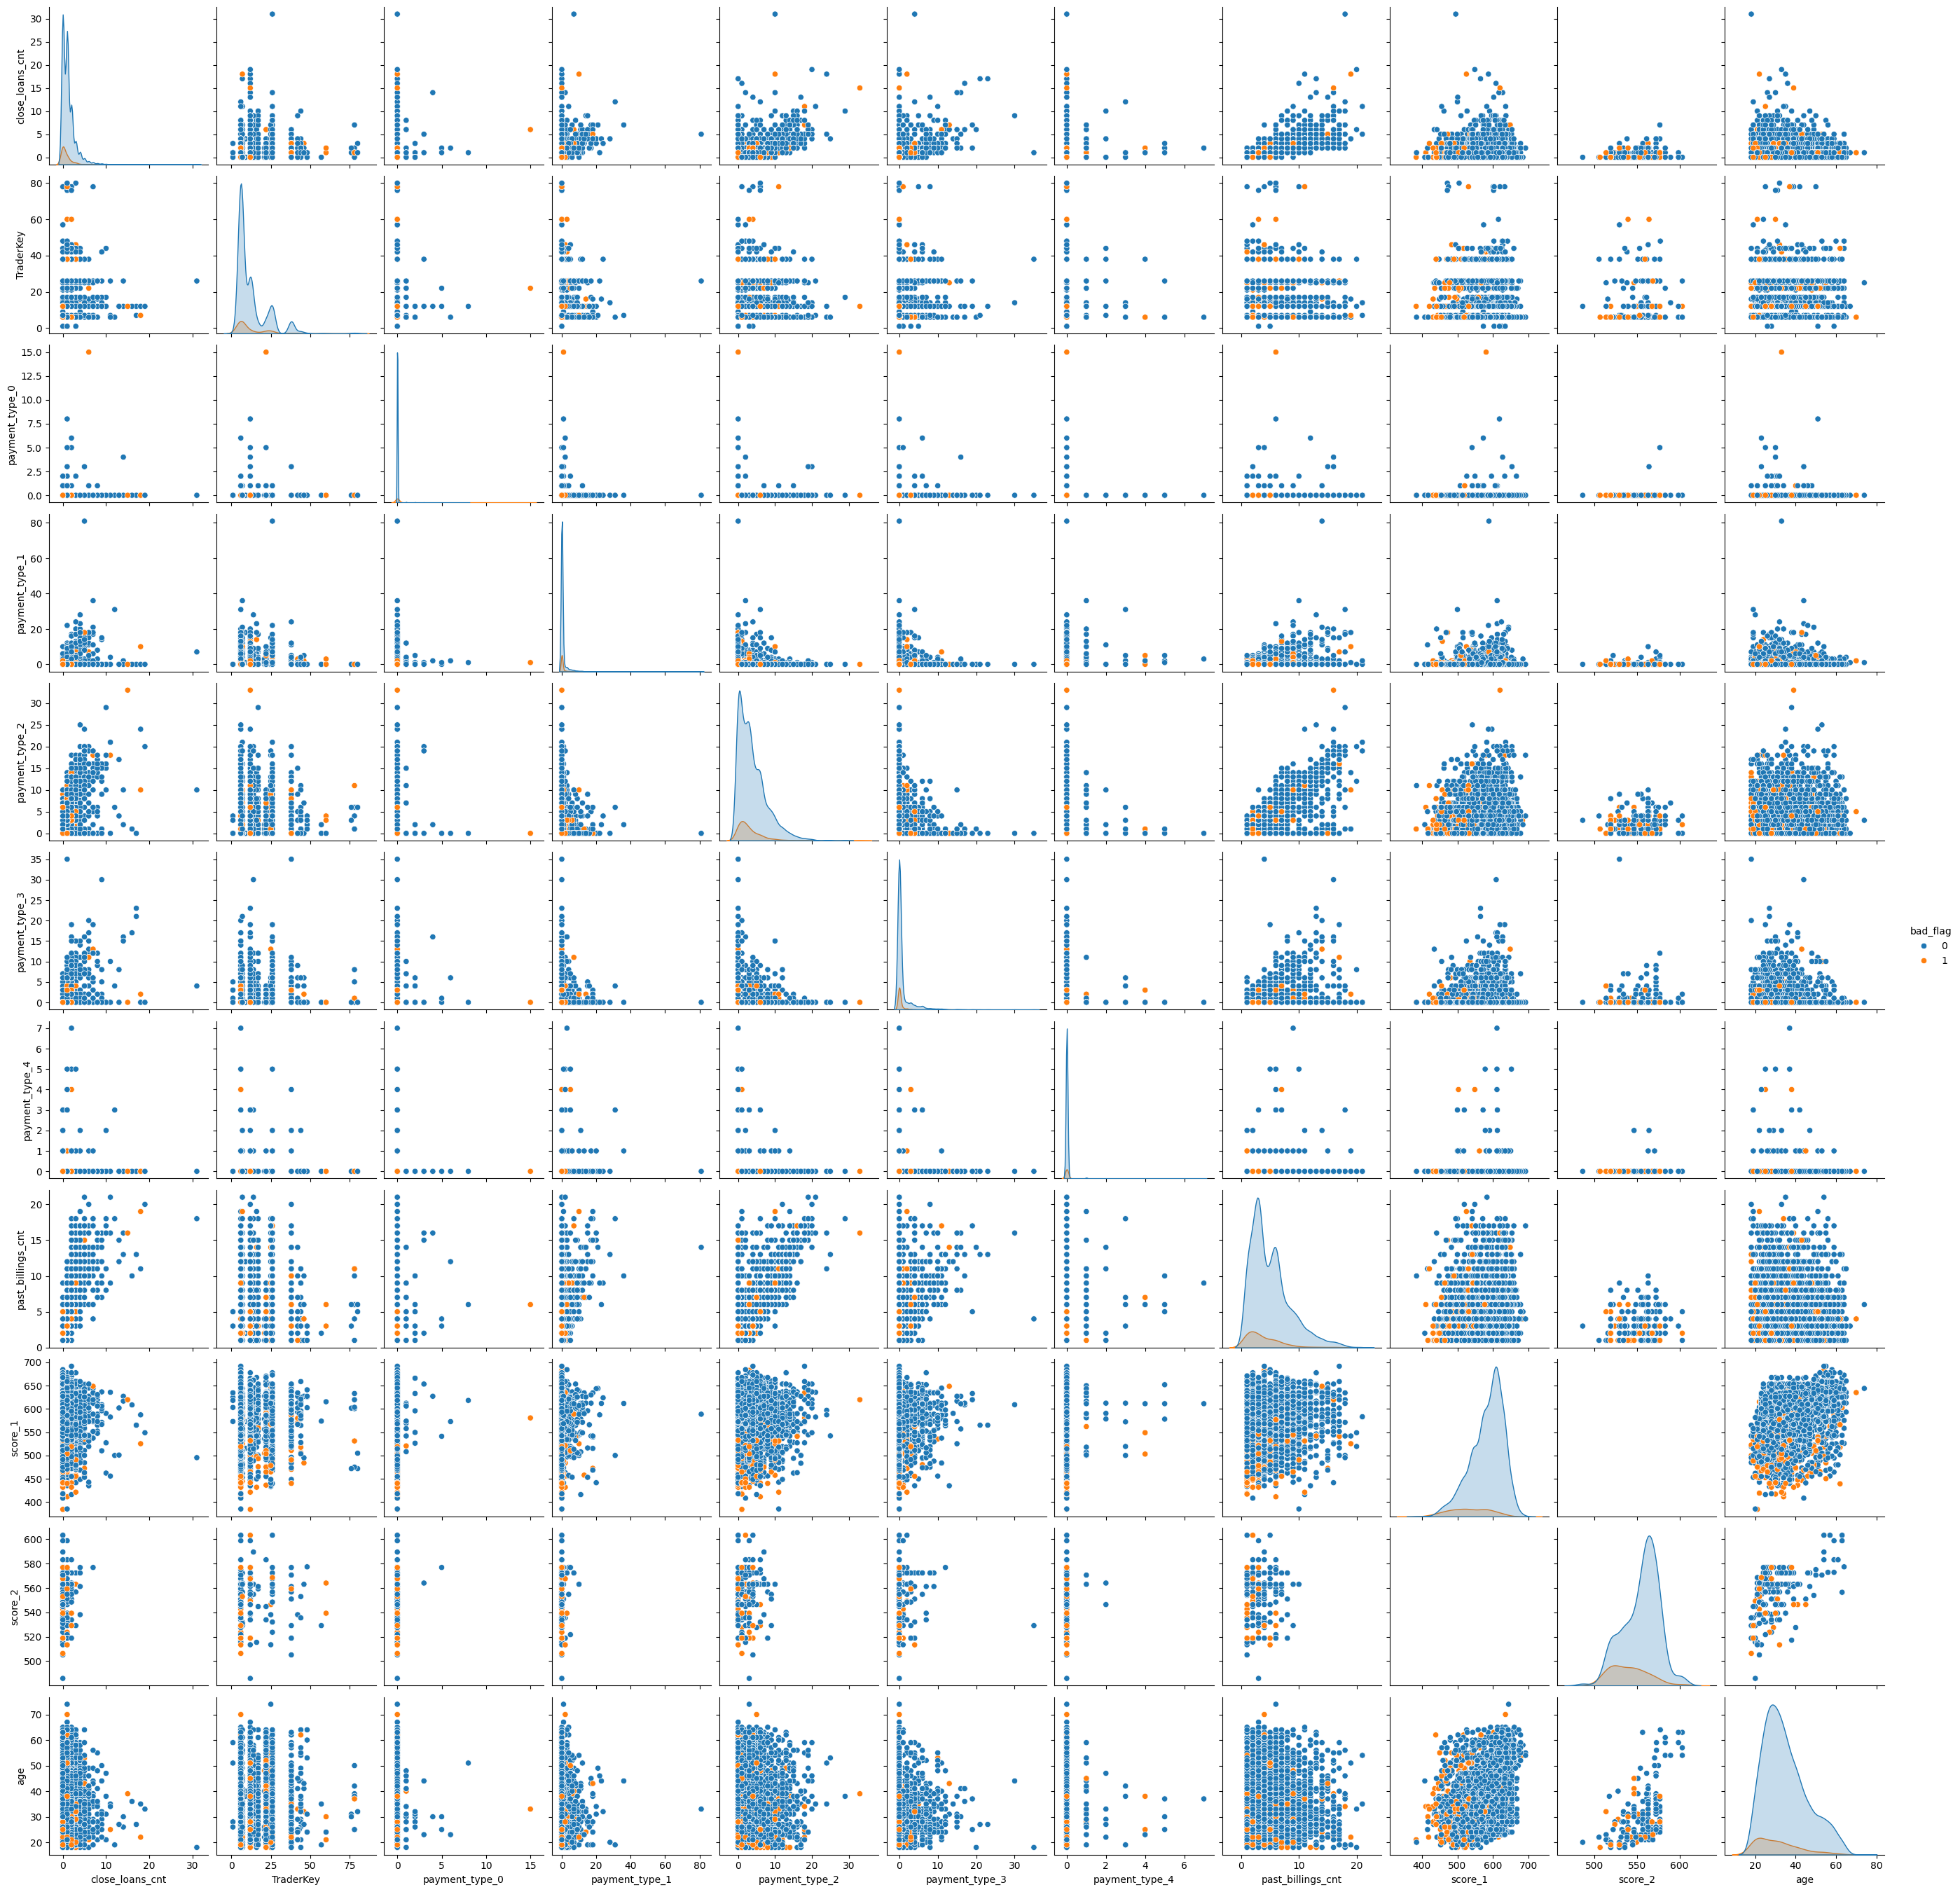

In [ ]:
sns.pairplot(data=new_df, hue='bad_flag')

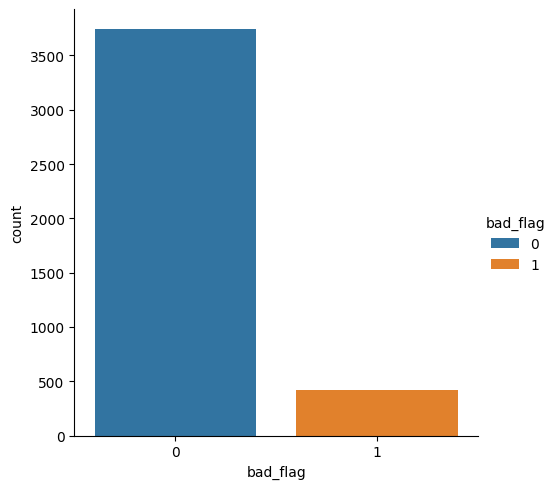

In [ ]:
sns.catplot(kind='count', data=df, x='bad_flag', hue='bad_flag')

In [ ]:
df.columns.tolist()

['loanKey',
 'rep_loan_date',
 'first_loan',
 'dpd_5_cnt',
 'dpd_15_cnt',
 'dpd_30_cnt',
 'first_overdue_date',
 'close_loans_cnt',
 'federal_district_nm',
 'TraderKey',
 'payment_type_0',
 'payment_type_1',
 'payment_type_2',
 'payment_type_3',
 'payment_type_4',
 'past_billings_cnt',
 'score_1',
 'score_2',
 'age',
 'gender',
 'bad_flag']

In [ ]:
payment_features = [col for col in df.columns.tolist() if 'payment' in col]
payment_features

['payment_type_0',
 'payment_type_1',
 'payment_type_2',
 'payment_type_3',
 'payment_type_4']

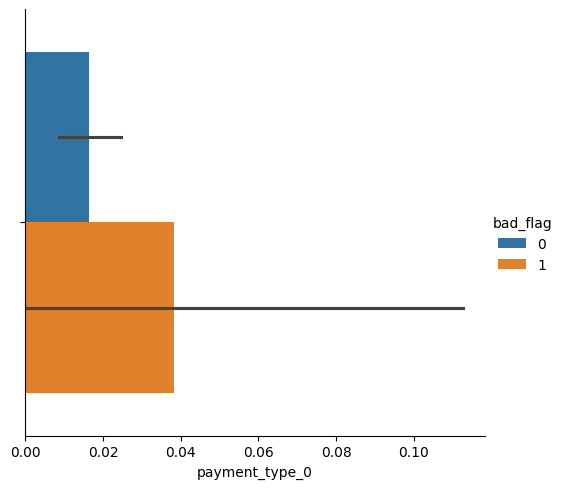

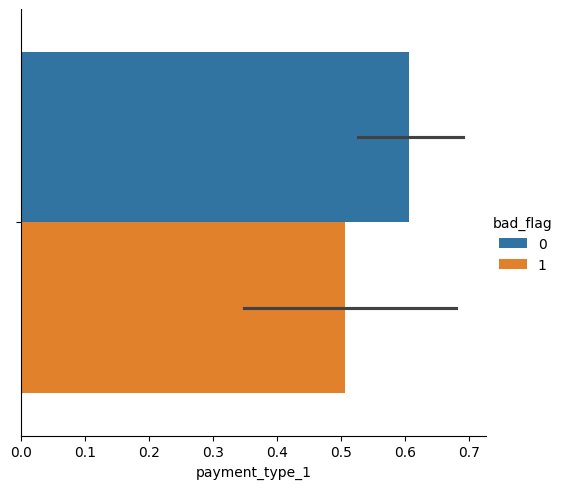

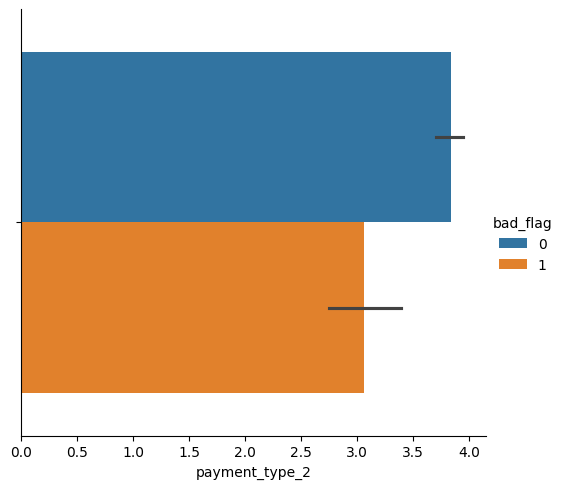

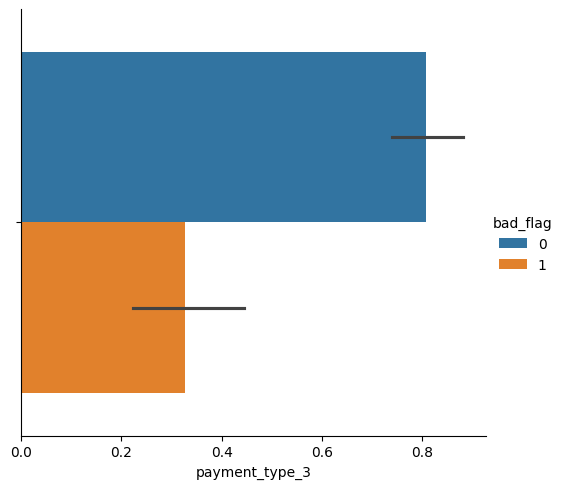

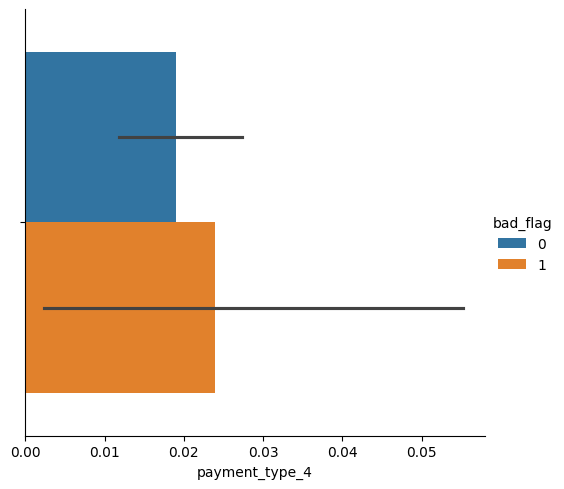

In [ ]:
for i, feat in enumerate(payment_features):
  sns.catplot(kind='bar', data=df, x=df[feat], hue='bad_flag')

In [ ]:
df[payment_features]

,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4
0,0,0,10,0,0
1,0,0,6,0,0
2,0,0,0,5,0
3,0,0,4,0,0
4,0,3,0,0,0
...,...,...,...,...,...
4152,0,0,1,0,0
4153,0,0,4,0,0
4154,0,0,4,0,0
4155,0,0,4,0,0


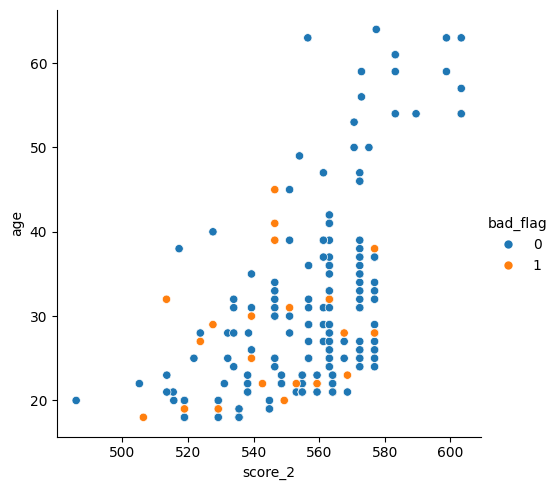

In [ ]:
sns.relplot(kind='scatter', data=df, x='score_2', y='age', hue='bad_flag')

In [ ]:
df['payment_type_0'].describe()

count    4157.000000
mean        0.018523
std         0.330359
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        15.000000
Name: payment_type_0, dtype: float64

In [ ]:
df

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,past_billings_cnt,score_1,score_2,age,gender,bad_flag
0,708382,2016-10-06,2015-11-13,NaN,NaN,NaN,NaN,3.0,region_6,6,0,0,10,0,0,10.0,NaN,NaN,21.0,False,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,0,0,6,0,0,5.0,NaN,NaN,20.0,False,0
2,779736,2016-10-30,2015-12-21,NaN,NaN,NaN,NaN,2.0,region_1,6,0,0,0,5,0,5.0,NaN,NaN,19.0,False,0
3,556376,2016-06-29,2015-06-30,NaN,NaN,NaN,NaN,1.0,region_6,14,0,0,4,0,0,6.0,NaN,NaN,21.0,False,0
4,266968,2015-12-01,2015-08-03,NaN,NaN,NaN,NaN,0.0,region_5,22,0,3,0,0,0,3.0,NaN,NaN,33.0,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,NaN,NaN,NaN,NaN,0.0,region_5,7,0,0,1,0,0,NaN,NaN,563.089780,26.0,False,0
4153,596156,2016-08-06,2016-03-11,NaN,NaN,NaN,NaN,1.0,region_2,12,0,0,4,0,0,3.0,NaN,576.875277,38.0,False,1
4154,645359,2016-09-05,2016-04-30,NaN,NaN,NaN,NaN,1.0,region_2,12,0,0,4,0,0,4.0,NaN,554.816921,21.0,False,0
4155,730681,2016-10-14,2016-05-20,NaN,NaN,NaN,NaN,0.0,region_6,7,0,0,4,0,0,4.0,NaN,563.089780,35.0,False,0


In [261]:
df[['first_loan', 'rep_loan_date']] = (df[['first_loan', 'rep_loan_date']]).apply(pd.to_datetime)


In [262]:
df['days_between_payment_dues'] = (df['rep_loan_date'] - df['first_loan']).dt.days

In [263]:
df.dtypes

loanKey                               int64
rep_loan_date                datetime64[ns]
first_loan                   datetime64[ns]
dpd_5_cnt                           float64
dpd_15_cnt                          float64
dpd_30_cnt                          float64
first_overdue_date                   object
close_loans_cnt                     float64
federal_district_nm                  object
TraderKey                             int64
payment_type_0                        int64
payment_type_1                        int64
payment_type_2                        int64
payment_type_3                        int64
payment_type_4                        int64
past_billings_cnt                   float64
score_1                             float64
score_2                             float64
age                                 float64
gender                                 bool
bad_flag                              int64
days_between_payment_dues             int64
dtype: object

In [264]:
df.fillna(value=0, inplace=True)

In [265]:
df

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,federal_district_nm,TraderKey,payment_type_0,payment_type_1,payment_type_2,payment_type_3,payment_type_4,past_billings_cnt,score_1,score_2,age,gender,bad_flag,days_between_payment_dues
0,708382,2016-10-06,2015-11-13,0.0,0.0,0.0,0,3.0,region_6,6,0,0,10,0,0,10.0,0.0,0.000000,21.0,False,0,328
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,region_6,6,0,0,6,0,0,5.0,0.0,0.000000,20.0,False,0,180
2,779736,2016-10-30,2015-12-21,0.0,0.0,0.0,0,2.0,region_1,6,0,0,0,5,0,5.0,0.0,0.000000,19.0,False,0,314
3,556376,2016-06-29,2015-06-30,0.0,0.0,0.0,0,1.0,region_6,14,0,0,4,0,0,6.0,0.0,0.000000,21.0,False,0,365
4,266968,2015-12-01,2015-08-03,0.0,0.0,0.0,0,0.0,region_5,22,0,3,0,0,0,3.0,0.0,0.000000,33.0,False,0,120
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,0.0,0.0,0.0,0,0.0,region_5,7,0,0,1,0,0,0.0,0.0,563.089780,26.0,False,0,25
4153,596156,2016-08-06,2016-03-11,0.0,0.0,0.0,0,1.0,region_2,12,0,0,4,0,0,3.0,0.0,576.875277,38.0,False,1,148
4154,645359,2016-09-05,2016-04-30,0.0,0.0,0.0,0,1.0,region_2,12,0,0,4,0,0,4.0,0.0,554.816921,21.0,False,0,128
4155,730681,2016-10-14,2016-05-20,0.0,0.0,0.0,0,0.0,region_6,7,0,0,4,0,0,4.0,0.0,563.089780,35.0,False,0,147


In [266]:
#encoding
cat = df.select_dtypes(include='object')
df['first_overdue_date'] = pd.to_datetime(df['first_overdue_date'])

In [267]:
df = pd.get_dummies(data=df, columns=['federal_district_nm'], drop_first=False)

In [268]:
df

,loanKey,rep_loan_date,first_loan,dpd_5_cnt,dpd_15_cnt,dpd_30_cnt,first_overdue_date,close_loans_cnt,TraderKey,payment_type_0,payment_type_1,payment_type_2,...,gender,bad_flag,days_between_payment_dues,federal_district_nm_0,federal_district_nm_region_0,federal_district_nm_region_1,federal_district_nm_region_2,federal_district_nm_region_3,federal_district_nm_region_4,federal_district_nm_region_5,federal_district_nm_region_6,federal_district_nm_region_7
0,708382,2016-10-06,2015-11-13,0.0,0.0,0.0,1970-01-01,3.0,6,0,0,10,...,False,0,328,0,0,0,0,0,0,0,1,0
1,406305,2016-03-26,2015-09-28,1.0,0.0,0.0,2016-01-30,0.0,6,0,0,6,...,False,0,180,0,0,0,0,0,0,0,1,0
2,779736,2016-10-30,2015-12-21,0.0,0.0,0.0,1970-01-01,2.0,6,0,0,0,...,False,0,314,0,0,1,0,0,0,0,0,0
3,556376,2016-06-29,2015-06-30,0.0,0.0,0.0,1970-01-01,1.0,14,0,0,4,...,False,0,365,0,0,0,0,0,0,0,1,0
4,266968,2015-12-01,2015-08-03,0.0,0.0,0.0,1970-01-01,0.0,22,0,3,0,...,False,0,120,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4152,533637,2016-06-11,2016-05-17,0.0,0.0,0.0,1970-01-01,0.0,7,0,0,1,...,False,0,25,0,0,0,0,0,0,1,0,0
4153,596156,2016-08-06,2016-03-11,0.0,0.0,0.0,1970-01-01,1.0,12,0,0,4,...,False,1,148,0,0,0,1,0,0,0,0,0
4154,645359,2016-09-05,2016-04-30,0.0,0.0,0.0,1970-01-01,1.0,12,0,0,4,...,False,0,128,0,0,0,1,0,0,0,0,0
4155,730681,2016-10-14,2016-05-20,0.0,0.0,0.0,1970-01-01,0.0,7,0,0,4,...,False,0,147,0,0,0,0,0,0,0,1,0


In [329]:
## Modeling
from sklearn.model_selection import train_test_split as tts

In [342]:
df.columns.tolist()

['loanKey',
 'dpd_5_cnt',
 'dpd_15_cnt',
 'dpd_30_cnt',
 'close_loans_cnt',
 'TraderKey',
 'payment_type_0',
 'payment_type_1',
 'payment_type_2',
 'payment_type_3',
 'payment_type_4',
 'past_billings_cnt',
 'score_1',
 'score_2',
 'age',
 'gender',
 'bad_flag',
 'days_between_payment_dues',
 'federal_district_nm_0',
 'federal_district_nm_region_0',
 'federal_district_nm_region_1',
 'federal_district_nm_region_2',
 'federal_district_nm_region_3',
 'federal_district_nm_region_4',
 'federal_district_nm_region_5',
 'federal_district_nm_region_6',
 'federal_district_nm_region_7']

In [345]:
cols = ["dpd_5_cnt",
    "dpd_15_cnt",
    "dpd_30_cnt",
    "close_loans_cnt",
    "payment_type_0",
    "payment_type_1",
    "payment_type_2",
    "payment_type_3",
    "payment_type_4",
    "past_billings_cnt",
    "score_1",
    "score_2",
    "age",
    "days_between_payment_dues",
    "gender",
 'federal_district_nm_0',
 'federal_district_nm_region_0',
 'federal_district_nm_region_1',
 'federal_district_nm_region_2',
 'federal_district_nm_region_3',
 'federal_district_nm_region_4',
 'federal_district_nm_region_5',
 'federal_district_nm_region_6',
 'federal_district_nm_region_7']

In [332]:
y

0       0
1       0
2       0
3       0
4       0
       ..
4152    0
4153    1
4154    0
4155    0
4156    1
Name: bad_flag, Length: 4157, dtype: int64

In [366]:
X_train, X_test, y_train, y_test = tts(df[cols], df['bad_flag'], test_size=0.2, random_state=0)

In [347]:
from sklearn.linear_model import LogisticRegression

In [350]:
log_reg = LogisticRegression(solver='lbfgs')

In [351]:
log_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [353]:
y_pred = log_reg.predict(X_test)

In [354]:
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay

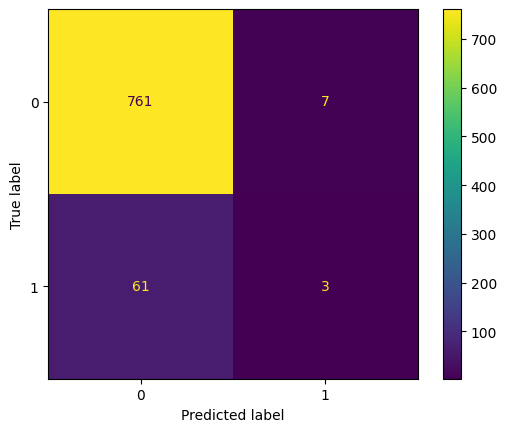

In [358]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')

In [362]:
from sklearn.tree import DecisionTreeClassifier

In [380]:
model = DecisionTreeClassifier(criterion='gini', max_depth=9, random_state=0)

In [381]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [382]:
y_pred = model.predict(X_test)

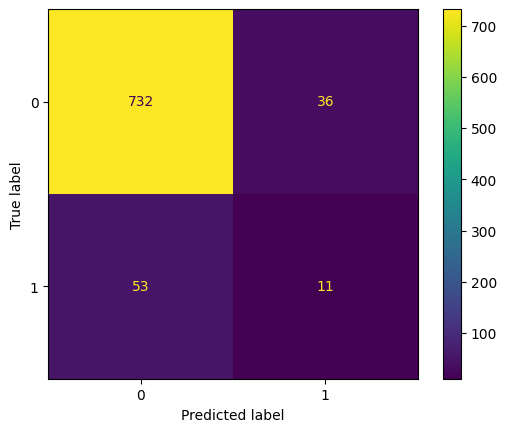

In [383]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')

In [384]:
from sklearn.metrics import f1_score

In [385]:
f1_score(y_true=y_test, y_pred=y_pred)

0.19819819819819817

In [387]:
print(classification_report(y_true=y_test, y_pred=y_pred))

              precision    recall  f1-score   support

           0       0.93      0.95      0.94       768
           1       0.23      0.17      0.20        64

    accuracy                           0.89       832
   macro avg       0.58      0.56      0.57       832
weighted avg       0.88      0.89      0.89       832



import imblearn
from imblearn.oversampling import SMOTE

In [393]:
import imblearn
from imblearn.over_sampling import SMOTE

In [394]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [395]:
model.fit(X_train_resampled, y_train_resampled)

DecisionTreeClassifier(max_depth=9, random_state=0)

In [397]:
y_pred = model.predict(X_test)

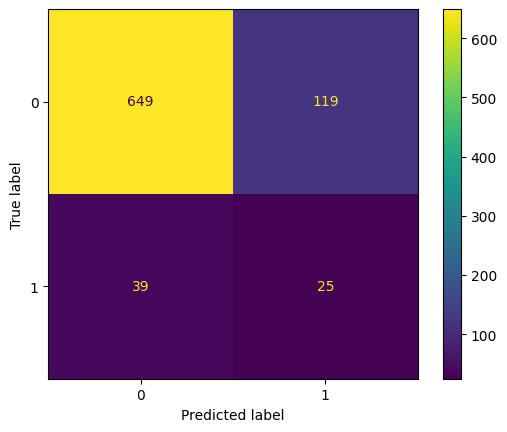

In [398]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap='viridis')

In [405]:
import collections

In [406]:
collections.Counter(y_train_resampled)

Counter({0: 2972, 1: 2972})

In [407]:
collections.Counter(y_train)

Counter({0: 2972, 1: 353})